In [132]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

 ## Helper Functions

In [133]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [134]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

## Import Fashion MNIST dataset

Dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:


![Fashion MNIST dataset](dataset.png)


In [135]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [136]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [137]:
train_images.shape

(60000, 28, 28)

In [138]:
len(train_labels)

60000

In [139]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Test dataset

In [140]:
test_images.shape

(10000, 28, 28)

In [141]:
len(test_labels)

10000

## Preprocessing

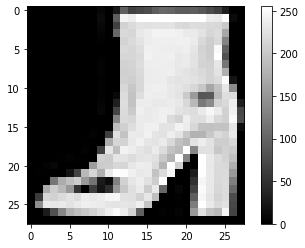

In [142]:
plt.figure()
plt.imshow(train_images[88], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [143]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build & Compile the model

In [144]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [145]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [147]:
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 2s 870us/step - loss: 0.4960 - accuracy: 0.8253
Epoch 2/12
1875/1875 [==============================] - 2s 888us/step - loss: 0.3700 - accuracy: 0.8678
Epoch 3/12
1875/1875 [==============================] - 2s 872us/step - loss: 0.3372 - accuracy: 0.8756
Epoch 4/12
1875/1875 [==============================] - 2s 860us/step - loss: 0.3126 - accuracy: 0.8862
Epoch 5/12
1875/1875 [==============================] - 2s 871us/step - loss: 0.2953 - accuracy: 0.8907
Epoch 6/12
1875/1875 [==============================] - 2s 874us/step - loss: 0.2791 - accuracy: 0.8958
Epoch 7/12
1875/1875 [==============================] - 2s 871us/step - loss: 0.2676 - accuracy: 0.9011
Epoch 8/12
1875/1875 [==============================] - 2s 893us/step - loss: 0.2573 - accuracy: 0.9043
Epoch 9/12
1875/1875 [==============================] - 2s 902us/step - loss: 0.2460 - accuracy: 0.9080
Epoch 10/12
1875/1875 [==============================] - 2s 936u

In [148]:
KERAS_MODEL_NAME = "tf_model_fashion_mnist.h5"
model.save(KERAS_MODEL_NAME)

In [149]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 1.191 Megabytes


In [150]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

In [151]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy is {}%'.format(round(100*test_acc, 2)))

313/313 - 0s - loss: 0.3389 - accuracy: 0.8816 - 276ms/epoch - 881us/step

Test accuracy is 88.16%


## TensorFlow Lite model

In [152]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpx6q8n7m6/assets


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpx6q8n7m6/assets
2021-11-09 14:42:27.976261: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-11-09 14:42:27.976278: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-11-09 14:42:27.976506: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpx6q8n7m6
2021-11-09 14:42:27.977879: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-11-09 14:42:27.977899: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmpx6q8n7m6
2021-11-09 14:42:27.983321: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-09 14:42:28.026436: I tensorflow/cc/saved_model/loader.cc:194] Running initializatio

408680

In [153]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 399.102 Kilobytes


In [154]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

## Check input Tensor shape

In [155]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


## Resize Tensor shape

In [156]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [157]:
test_images.dtype

dtype('float64')

In [158]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)
test_imgs_numpy.dtype

dtype('float32')

In [159]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [160]:
acc = accuracy_score(prediction_classes, test_labels)
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE model is 88.16%


In [161]:
tflite_file_size/keras_model_size

0.3273084907352828

## TensorFlow Lite model Float 16

In [162]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp2igi0kqa/assets


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp2igi0kqa/assets
2021-11-09 14:42:29.577913: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-11-09 14:42:29.577933: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-11-09 14:42:29.578076: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp2igi0kqa
2021-11-09 14:42:29.579497: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-11-09 14:42:29.579511: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp2igi0kqa
2021-11-09 14:42:29.585053: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-09 14:42:29.632898: I tensorflow/cc/saved_model/loader.cc:194] Running initializatio

In [163]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

205776

In [164]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), "KB")

File size: 200.953 Kilobytes


In [165]:
tflite_float_16_file_size = get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)
tflite_float_16_file_size/keras_model_size


0.16480432609754223

In [166]:
tflite_float_16_file_size/tflite_file_size

0.5035137515904864

## TensorFlow Lite Quantized

In [167]:
TF_LITE_SIZE_QUANT_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"

In [181]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp9le8p2ci/assets


INFO:tensorflow:Assets written to: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp9le8p2ci/assets
2021-11-09 14:43:50.930150: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-11-09 14:43:50.930164: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-11-09 14:43:50.930272: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp9le8p2ci
2021-11-09 14:43:50.931323: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-11-09 14:43:50.931333: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/30/_b_jsy997wl5p8hwvx0dhlpr0000gq/T/tmp9le8p2ci
2021-11-09 14:43:50.935382: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-11-09 14:43:50.976221: I tensorflow/cc/saved_model/loader.cc:194] Running initializatio

In [182]:
tflite_model_name = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

103984

In [183]:
convert_bytes(get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME), "KB")

File size: 101.547 Kilobytes


In [171]:
tflite_float_quant_file_size = get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)

In [184]:
tflite_float_quant_file_size/keras_model_size

0.08327994054178733

In [185]:
tflite_float_quant_file_size/ tflite_float_16_file_size

0.5053261799238007

## Accuracy of Quantized Model

In [186]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [187]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [188]:
test_images.dtype

dtype('float64')

In [189]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [190]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [191]:
acc = accuracy_score(prediction_classes, test_labels)

In [192]:
print('Test accuracy TFLITE Quantized model is {}%'.format(round(100*acc, 2)))

Test accuracy TFLITE Quantized model is 88.21%
